##  Predicting Term Deposit Subscription using Bank Marketing Data

This project aims to build a predictive model that determines whether a client will subscribe to a term deposit based on historical marketing campaign data from a banking institution. The data was collected from phone call-based direct marketing efforts

In [1]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 262.1 kB/s eta 0:09:31
   ---------------------------------------- 0.5/150.0 MB 262.1 kB/s eta 0:09:31
   ---------------------------------------- 0.8/150.0 MB 349.5 kB/s eta 0:07:07
   ---------------------------------------- 0.8/150.0 MB 349.5 kB/s eta 0:07:07
   --------------------------------------

In [59]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data modeling
from sklearn.model_selection import GridSearchCV, train_test_split,RandomizedSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay,classification_report

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance


In [2]:
# Dataset loading.
df=pd.read_csv('bank-additional-full.csv',sep=';')

In [3]:
df.head(15)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Exploratory Data Analsis.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
# dataset descriptive statistics.
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
df.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

The dataset has got no missing values.

#### Target variable distribution.

C:\Users\K.Andoh\AppData\Local\Temp\ipykernel_7292\1056922782.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='y', palette='Set2')


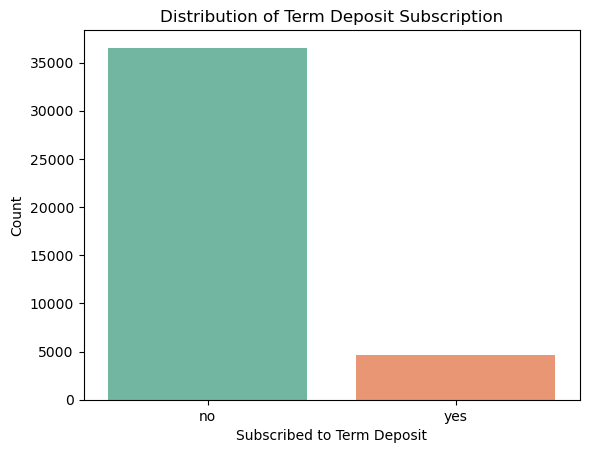

In [9]:
# Target variable distribution
sns.countplot(data=df, x='y', palette='Set2')
plt.title('Distribution of Term Deposit Subscription')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Count')
plt.show()

In [10]:
# percentage distribution
target_dist = df['y'].value_counts(normalize=True) * 100
print("Class distribution (%):")
print(target_dist)

Class distribution (%):
y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64


There is an imbalance in the target class. More than 85% of the customers did not subscribe to the term deposit.

#### Univariate analysis of categorical columns.

In [11]:
# List of categorical features (excluding target)
cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                'contact', 'month', 'day_of_week', 'poutcome']

C:\Users\K.Andoh\AppData\Local\Temp\ipykernel_7292\3984224913.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set3')


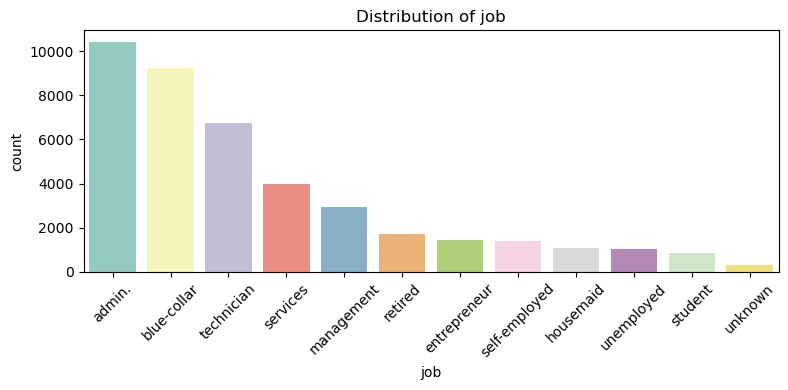

C:\Users\K.Andoh\AppData\Local\Temp\ipykernel_7292\3984224913.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set3')


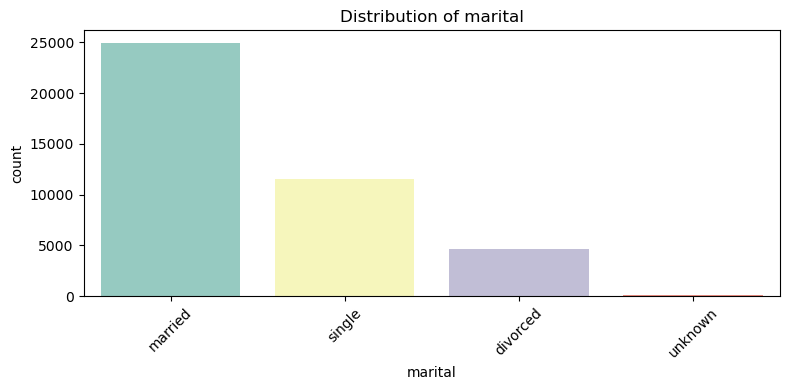

C:\Users\K.Andoh\AppData\Local\Temp\ipykernel_7292\3984224913.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set3')


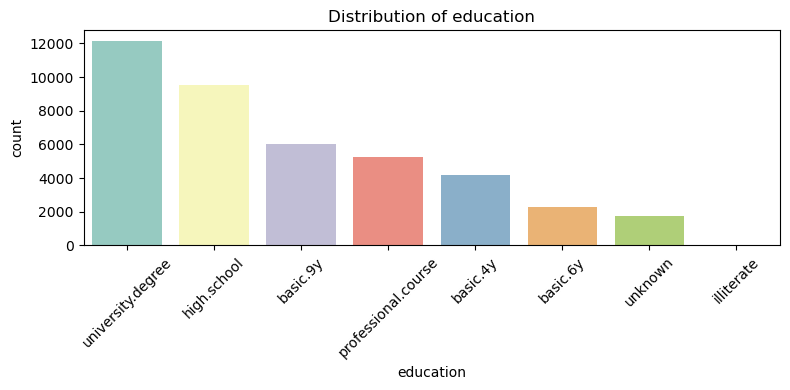

C:\Users\K.Andoh\AppData\Local\Temp\ipykernel_7292\3984224913.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set3')


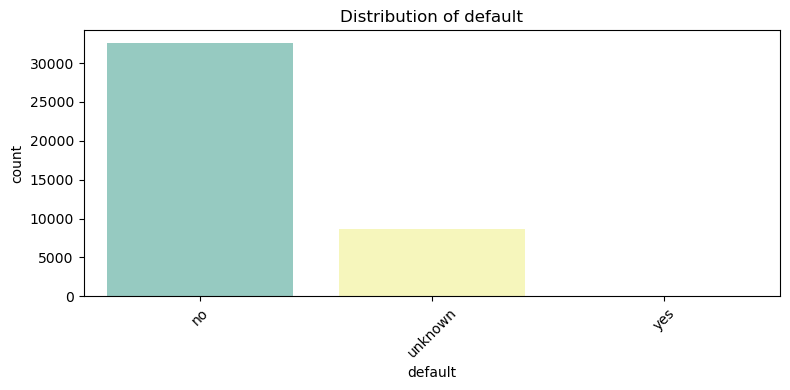

C:\Users\K.Andoh\AppData\Local\Temp\ipykernel_7292\3984224913.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set3')


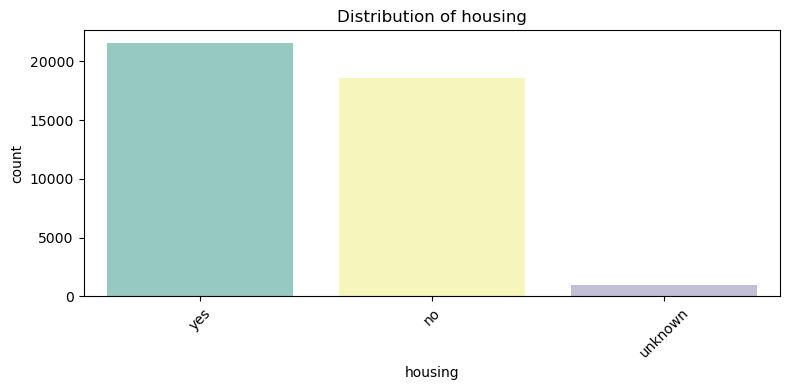

C:\Users\K.Andoh\AppData\Local\Temp\ipykernel_7292\3984224913.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set3')


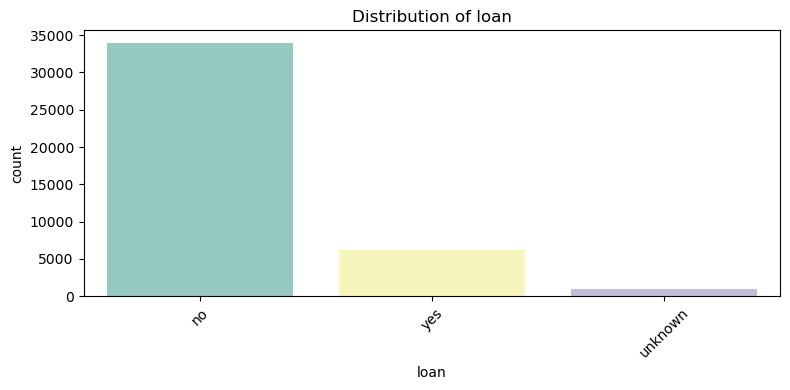

C:\Users\K.Andoh\AppData\Local\Temp\ipykernel_7292\3984224913.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set3')


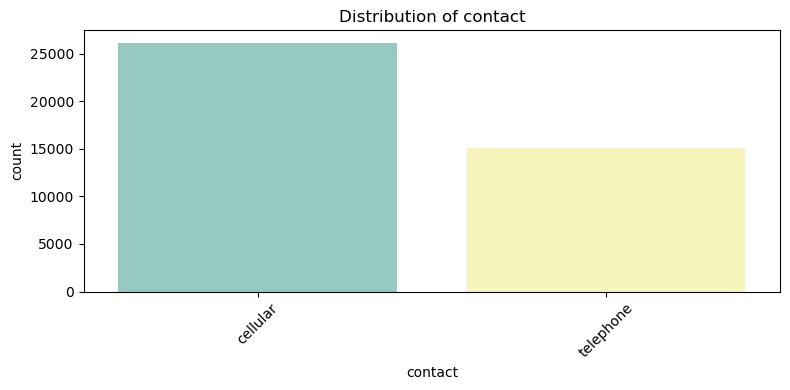

C:\Users\K.Andoh\AppData\Local\Temp\ipykernel_7292\3984224913.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set3')


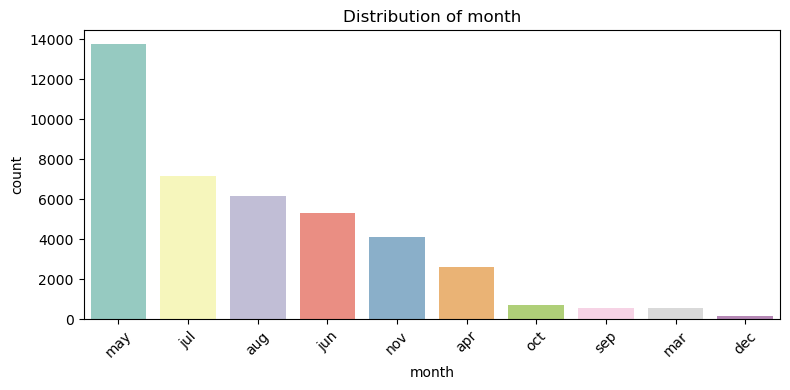

C:\Users\K.Andoh\AppData\Local\Temp\ipykernel_7292\3984224913.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set3')


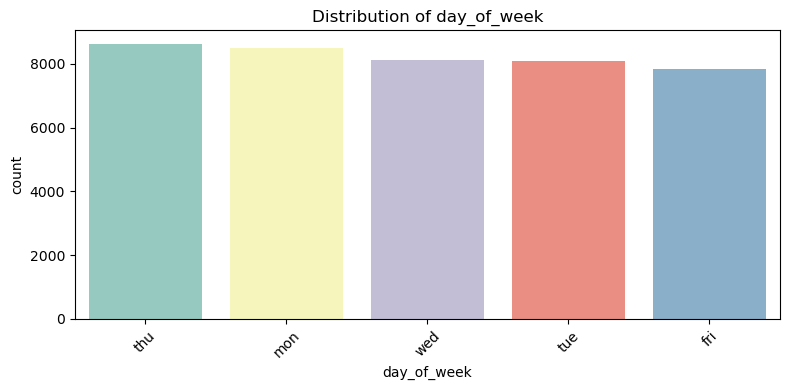

C:\Users\K.Andoh\AppData\Local\Temp\ipykernel_7292\3984224913.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set3')


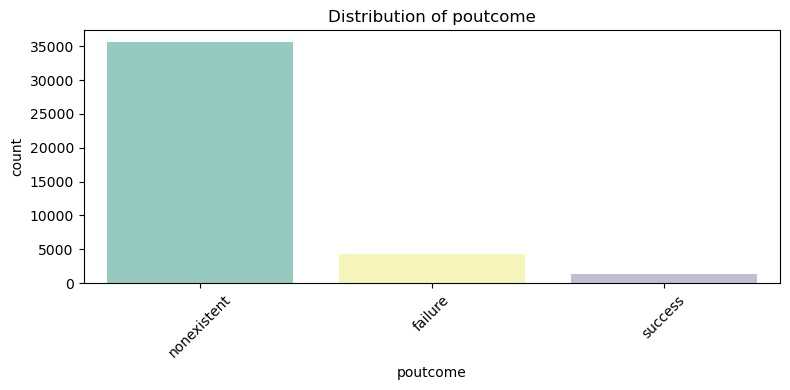

In [12]:
# Plot distribution of categorical features.
for col in cat_features:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set3')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [22]:
# Percentage of categorical features.
for col in cat_features:
    print(df[col].value_counts(normalize=True) * 100)
    print(f"Class distribution of {col} (%):, \n")
     

job
admin.           25.303486
blue-collar      22.467709
technician       16.371273
services          9.636302
management        7.099155
retired           4.175974
entrepreneur      3.535010
self-employed     3.450034
housemaid         2.573565
unemployed        2.461882
student           2.124405
unknown           0.801204
Name: proportion, dtype: float64
Class distribution of job (%):, 

marital
married     60.522482
single      28.085850
divorced    11.197436
unknown      0.194231
Name: proportion, dtype: float64
Class distribution of marital (%):, 

education
university.degree      29.542585
high.school            23.101389
basic.9y               14.676605
professional.course    12.729436
basic.4y               10.138875
basic.6y                5.564728
unknown                 4.202680
illiterate              0.043702
Name: proportion, dtype: float64
Class distribution of education (%):, 

default
no         79.120132
unknown    20.872584
yes         0.007284
Name: proportion, dt

* Administration, Blue-collar and Technician profession makes a huge proportion of targeted customer base
* The campaign also focused primarily on married customers.
* Also those with a university degree or education were targeted as well as people without a loan default.
* The months of May and July were busy during the campaign as more customers were contacted during this period.

#### Univariate analysis of numerical columns.

In [23]:
# List of numerical features (excluding duration)
num_features = ['age', 'campaign', 'pdays', 'previous', 
                'emp.var.rate', 'cons.price.idx', 
                'cons.conf.idx', 'euribor3m', 'nr.employed']

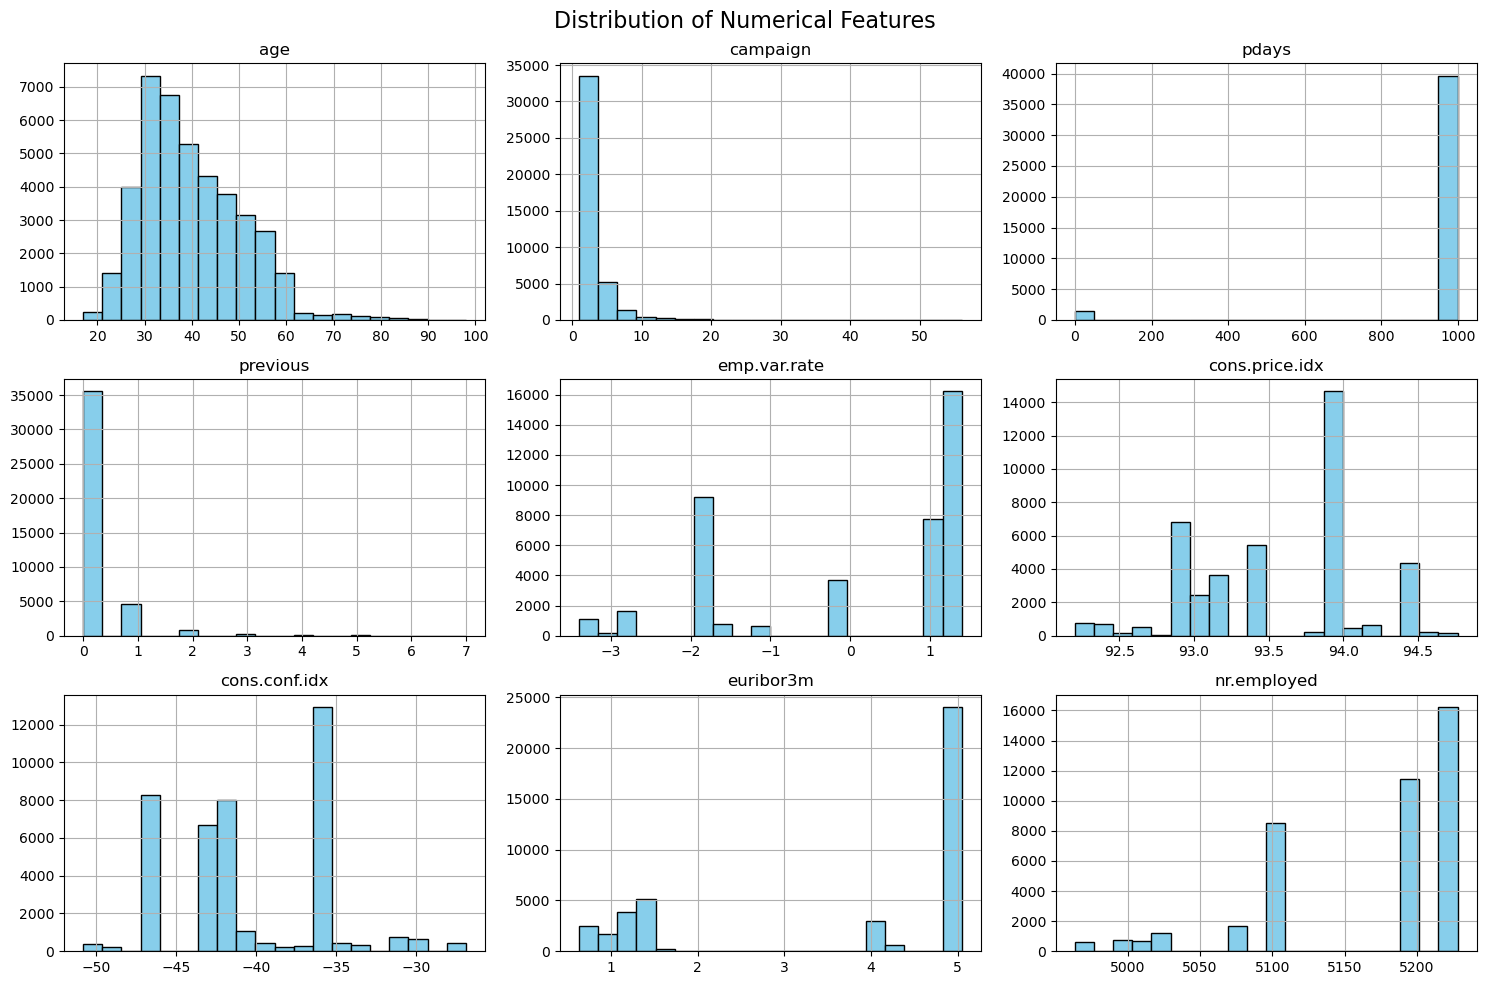

In [24]:
# Plot histograms
df[num_features].hist(bins=20, figsize=(15,10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

* The age column shows a normal distribution.
* The other numerical columns are either skewed or scattered distribution.


#### Bivariate analsis - Categorical vs Target

<Figure size 800x400 with 0 Axes>

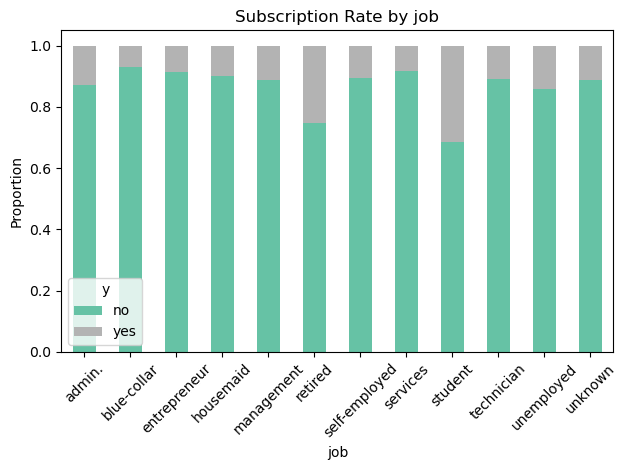

<Figure size 800x400 with 0 Axes>

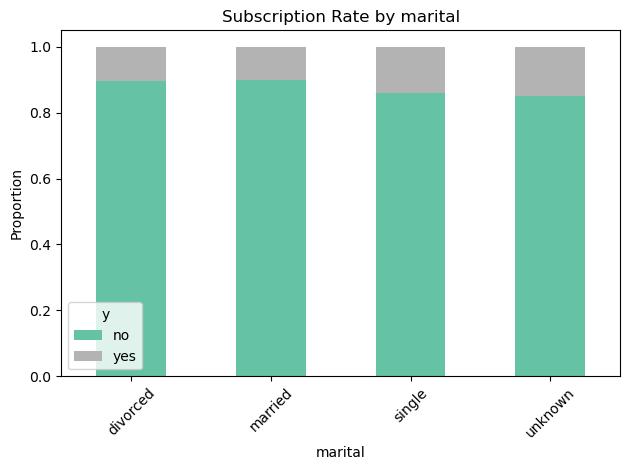

<Figure size 800x400 with 0 Axes>

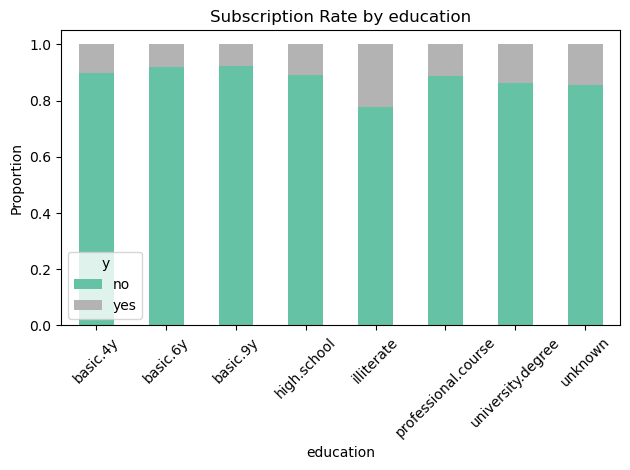

<Figure size 800x400 with 0 Axes>

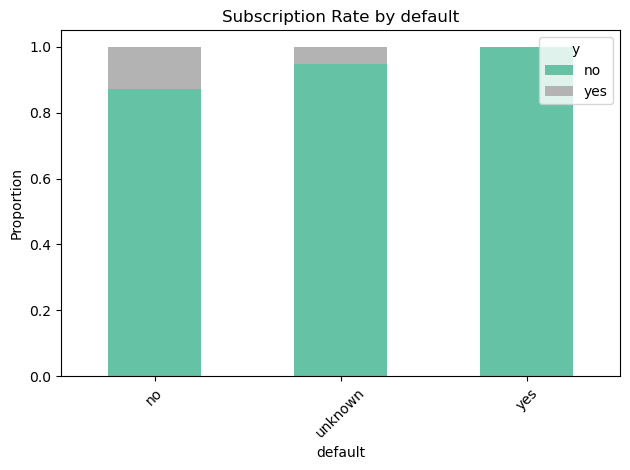

<Figure size 800x400 with 0 Axes>

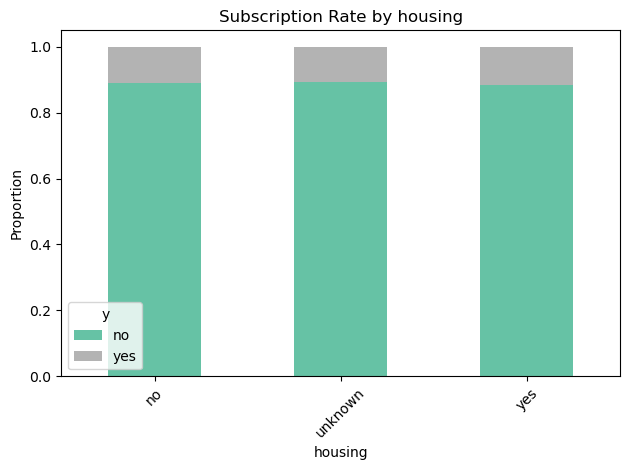

<Figure size 800x400 with 0 Axes>

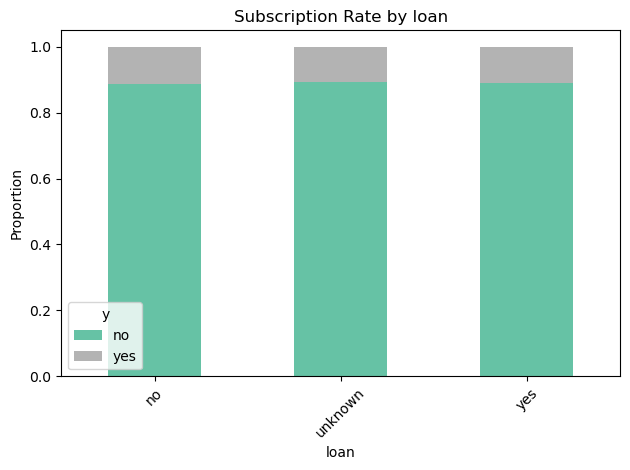

<Figure size 800x400 with 0 Axes>

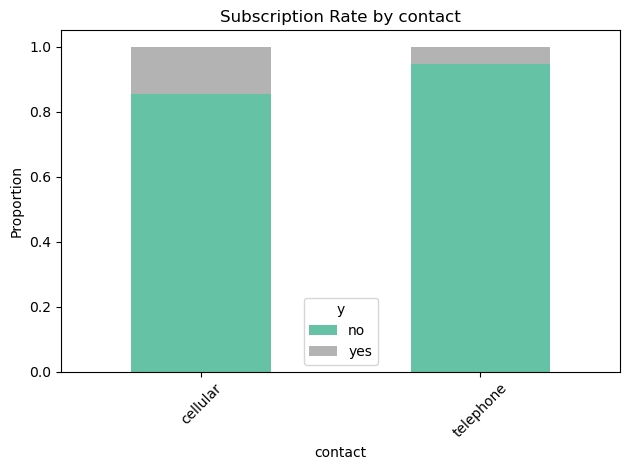

<Figure size 800x400 with 0 Axes>

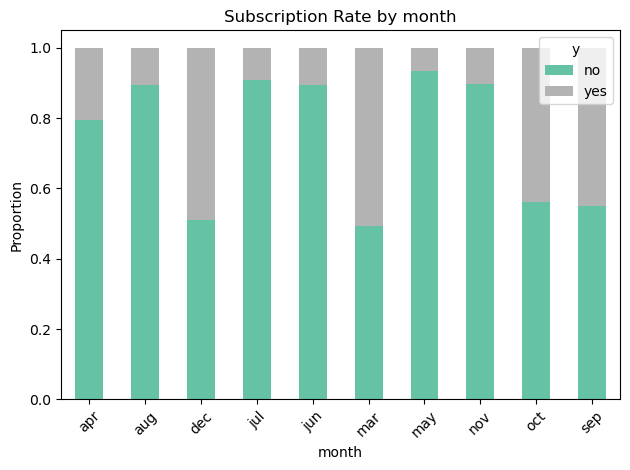

<Figure size 800x400 with 0 Axes>

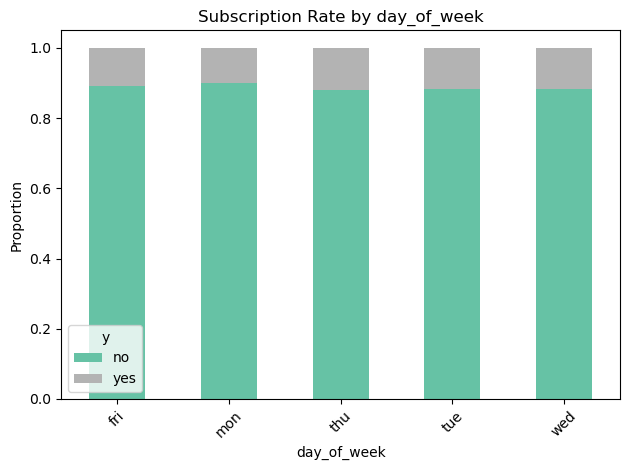

<Figure size 800x400 with 0 Axes>

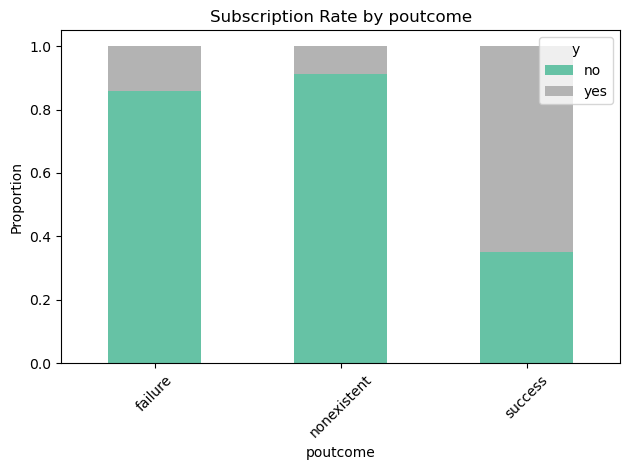

In [25]:
# subscription rate within each category
for col in cat_features:
    plt.figure(figsize=(8,4))
    prop_df = df.groupby(col)['y'].value_counts(normalize=True).unstack()
    prop_df.plot(kind='bar', stacked=True, colormap='Set2')
    plt.title(f'Subscription Rate by {col}')
    plt.ylabel('Proportion')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [32]:
for col in cat_features:
    plt.figure(figsize=(8,4))
    prop_df = df.groupby(col)['y'].value_counts(normalize=True).unstack()
    print(prop_df,'\n')

y                    no       yes
job                              
admin.         0.870274  0.129726
blue-collar    0.931057  0.068943
entrepreneur   0.914835  0.085165
housemaid      0.900000  0.100000
management     0.887825  0.112175
retired        0.747674  0.252326
self-employed  0.895144  0.104856
services       0.918619  0.081381
student        0.685714  0.314286
technician     0.891740  0.108260
unemployed     0.857988  0.142012
unknown        0.887879  0.112121 

y               no       yes
marital                     
divorced  0.896791  0.103209
married   0.898427  0.101573
single    0.859959  0.140041
unknown   0.850000  0.150000 

y                          no       yes
education                              
basic.4y             0.897510  0.102490
basic.6y             0.917976  0.082024
basic.9y             0.921754  0.078246
high.school          0.891645  0.108355
illiterate           0.777778  0.222222
professional.course  0.886515  0.113485
university.degree    0.862

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

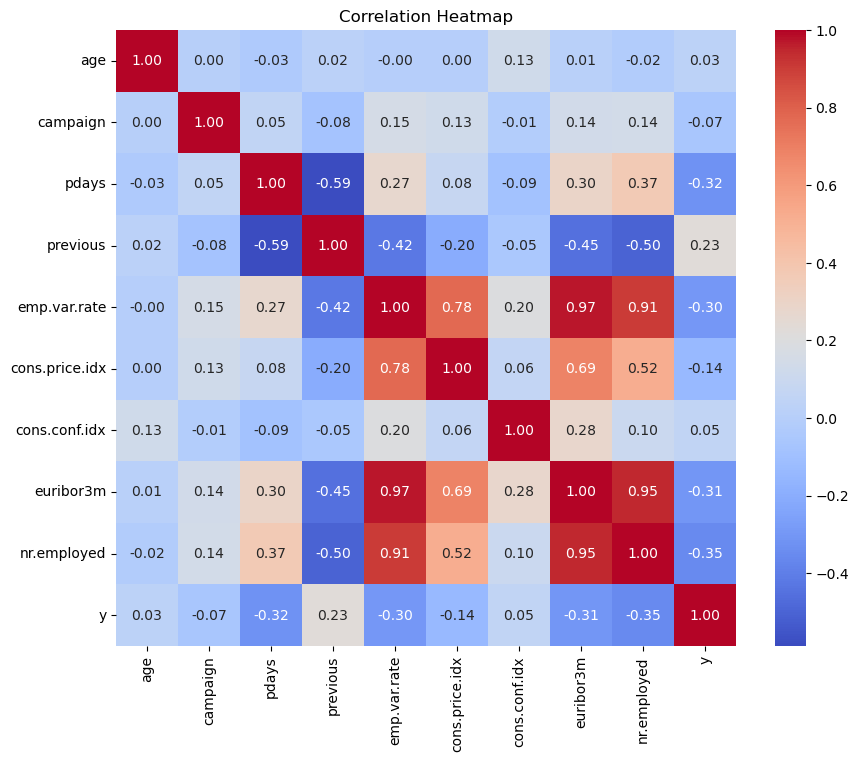

In [33]:
# target variable encoding
df_corr = df.copy()
df_corr['y'] = df_corr['y'].map({'yes': 1, 'no': 0})

# correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df_corr[num_features + ['y']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



* Job : 
Certain professions like retired, student, and unemployed have higher subscription rates than others.
Jobs like blue-collar or services have lower subscription rates.

* marital : 
Single clients may show slightly higher interest compared to married or divorced.

* education : 
Clients with tertiary or university education tend to subscribe more.
Unknown education categories may need attention or grouping.

* default, housing, loan : 
Clients who have no personal or housing loans tend to subscribe more.
Those with credit default = ‘yes’ almost never subscribe.


* contact : 
Cellular contacts result in more subscriptions than telephone.

* month : 
Success is higher in months like May, August, October.
December has very low conversion.
This may relate to business cycles or campaign strategies.

* day_of_week : 
Minimal variation across days, but you may check if weekends perform worse.

* duration : 
Longer call durations are strongly associated with subscriptions.
This variable must not be used in predictive modeling (it leaks future information — the duration is known only after the outcome).

* poutcome, previous, pdays : 
If the previous campaign was successful, clients are much more likely to say yes again.
The more previous interactions (previous > 0), the higher the likelihood of subscription.

* Lower euribor3m rates and higher consumer confidence tend to align with better subscription rates.

* These macro indicators correlate moderately with the target and may improve model accuracy.

* Strong positive predictors: `poutcome = success`, `job = retired/student`, `contact = cellular`

* Strong negative predictors: `default = yes`, `housing = yes`, `loan = yes`, `poutcome = failure`

### Feature engineering.

In [34]:
# Dropping 'duration' because it's not available before the outcome is known
df_model = df.drop(columns=['duration'])


In [35]:
# target variable to binary: 'yes' = 1, 'no' = 0
df_model['y'] = df_model['y'].map({'yes': 1, 'no': 0})


In [37]:
# columns with 'unknown' values
for col in df_model.columns:
    if df_model[col].dtype == 'object' and 'unknown' in df_model[col].unique():
        print(f"{col}: {df_model[col].value_counts()['unknown']} unknowns")


job: 330 unknowns
marital: 80 unknowns
education: 1731 unknowns
default: 8597 unknowns
housing: 990 unknowns
loan: 990 unknowns


These unknown values will be treated as their own category for now. However, they will be modified if later found to hurt model performance.

In [38]:
# categorical features
cat_features = df_model.select_dtypes(include='object').columns.tolist()

# one-hot encoding
df_encoded = pd.get_dummies(df_model, columns=cat_features, drop_first=True)


In [39]:
# features and target separated.
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Check final shape
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)


Feature matrix shape: (41188, 52)
Target vector shape: (41188,)


### Model construction.

In [40]:
# data split (80% train, 20% test), with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)

# class distribution in training and test sets
print("Training set class distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest set class distribution:")
print(y_test.value_counts(normalize=True))

# Print shape for verification
print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


Training set class distribution:
y
0    0.887344
1    0.112656
Name: proportion, dtype: float64

Test set class distribution:
y
0    0.887351
1    0.112649
Name: proportion, dtype: float64

X_train shape: (32950, 52)
X_test shape: (8238, 52)


In [44]:
# scaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Initialize SMOTE
smote = SMOTE(random_state=42)

# training data only
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# new class distribution
print("Balanced training set class distribution:")
print(Counter(y_train_balanced))


Balanced training set class distribution:
Counter({0: 29238, 1: 29238})


#### Random forest

In [46]:
# training Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)


RandomForestClassifier(random_state=42)

In [47]:
# Prediction on the scaled test set
y_pred_rf = rf_model.predict(X_test_scaled)

In [51]:
# performance evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      7310
           1       0.51      0.38      0.43       928

    accuracy                           0.89      8238
   macro avg       0.72      0.66      0.68      8238
weighted avg       0.88      0.89      0.88      8238

Random Forest Confusion Matrix:
[[6973  337]
 [ 580  348]]


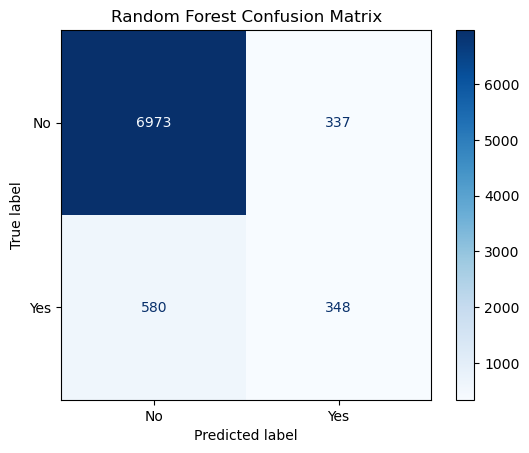

In [52]:
# Confustion matrix
disp_rf = ConfusionMatrixDisplay.from_estimator(rf_model, X_test_scaled, y_test,display_labels=['No', 'Yes'],cmap='Blues',values_format='d')

# title
disp_rf.ax_.set_title("Random Forest Confusion Matrix")
plt.show()


#### XGBoost model

In [53]:
# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_balanced, y_train_balanced)


C:\Users\K.Andoh\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:13:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [54]:
# Prediction on the scaled test set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Classification report
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7310
           1       0.60      0.33      0.43       928

    accuracy                           0.90      8238
   macro avg       0.76      0.65      0.69      8238
weighted avg       0.88      0.90      0.89      8238

XGBoost Confusion Matrix:
[[7103  207]
 [ 621  307]]


#### Hyperparameter tuning

In [57]:
# Base scale_pos_weight to deal with class imbalance
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

# Define parameter grid
param_grid = {'n_estimators': [100, 200, 300],'max_depth': [3, 5, 7, 10],'learning_rate': [0.01, 0.05, 0.1, 0.2],'subsample': [0.6, 0.8, 1.0],
'colsample_bytree': [0.6, 0.8, 1.0],'min_child_weight': [1, 3, 5],'gamma': [0, 0.1, 0.3],'scale_pos_weight': [scale_pos_weight]}


In [60]:
# base model
xgb_base = XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=42)

# Randomized search
random_search = RandomizedSearchCV(estimator=xgb_base, param_distributions=param_grid,n_iter=30, scoring='f1', 
verbose=1,n_jobs=-1,random_state=42)

# training data
random_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\K.Andoh\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:31:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.3],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 300],
                                        'scale_pos_weight': [7.876616379310345],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='f1', verbose=1)

In [61]:
# Best hyperparameters
print("Best Parameters from RandomizedSearchCV:")
print(random_search.best_params_)

# Best model
best_xgb = random_search.best_estimator_

Best Parameters from RandomizedSearchCV:
{'subsample': 0.8, 'scale_pos_weight': 7.876616379310345, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 0.6}


Tuned XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      7310
           1       0.43      0.65      0.51       928

    accuracy                           0.86      8238
   macro avg       0.69      0.77      0.72      8238
weighted avg       0.89      0.86      0.87      8238



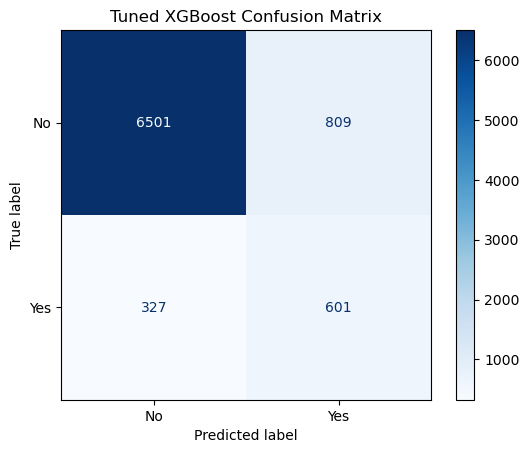

In [62]:
# Predict and evaluate
y_pred_best = best_xgb.predict(X_test_scaled)

print("Tuned XGBoost Classification Report:")
print(classification_report(y_test, y_pred_best))

ConfusionMatrixDisplay.from_estimator(best_xgb, X_test_scaled, y_test,display_labels=["No", "Yes"],cmap="Blues",
values_format='d')
plt.title("Tuned XGBoost Confusion Matrix")
plt.show()


#### Logistic Regression.

In [63]:
from sklearn.linear_model import LogisticRegression

# logistic regression
logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      7310
           1       0.37      0.64      0.47       928

    accuracy                           0.83      8238
   macro avg       0.66      0.75      0.68      8238
weighted avg       0.88      0.83      0.85      8238



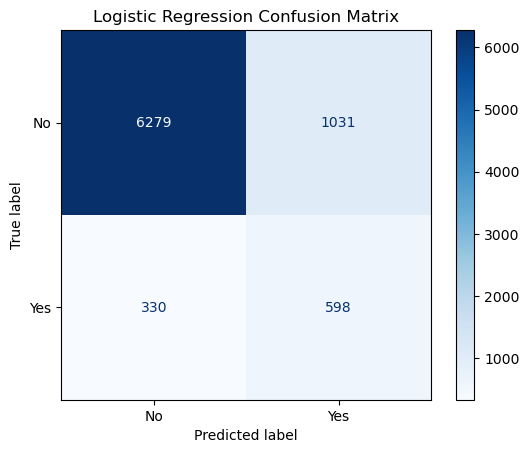

In [64]:
# Predict
y_pred_logreg = logreg.predict(X_test_scaled)

# Evaluation metrics
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(logreg, X_test_scaled, y_test,display_labels=["No", "Yes"],cmap="Blues",values_format='d')
plt.title("Logistic Regression Confusion Matrix")
plt.show()


#### Model selection.

## Key Business Insights.

### Most Influential Features

**Duration of last call:** Strongest predictor — longer calls → higher chance of “yes”

**Contact method:** cellular contact more effective than telephone

**Month:** Calls made in May and August less likely to succeed

**Previous outcome:** Clients with previous “success” campaigns are more likely to subscribe

### Characteristics of Likely Subscribers
Tend to be employed, married or single, and have cellular contact

Have successful past campaign history

Typically not contacted in May, and respond better after longer calls